### AE4465 (MM&A) - Lecture5 (Trendability)

In prognostics and health management (PHM), it is imperative to have quality data. In PHM we have three popular methods to do monotonicity, trendability and prognosability calculation.
Trendability is calculated as:

$$ tren = \min | corr(x_j, x_k)| \mbox{ where } j,k \in \{1, \ldots, M\} $$

Where:
$x_j$ and $x_k$ is a trajectory of measurements (vector)
$j,k$ is the jth, kth system respectively,
$M$ is the number of systems (or units),
$corr$ is the pearson correlation

In this tutorial we will explore C-MAPSS case study and how to calculate the trendability of a dataset of signals.


In [12]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats

### Data analysis

We can now open the CMAPSS dataset001 to perform some operations on the data.


In [2]:
# Import the data in csv file
df = pd.read_csv('data/les05_CMAPSStrain001.txt', sep=' ')
# Read the columns
print('The columns of the csv file are: ')
df.head()

The columns of the csv file are: 


,Equipment,Cycle,Op1,Op2,Op3,1,2,3,4,5,...,12,13,14,15,16,17,18,19,20,21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


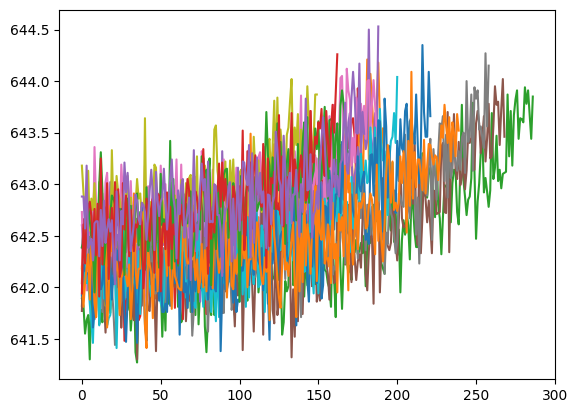

In [7]:
# Let's start by plotting our time series.
for id_equipment in range(15):
    mask_equip1 = df['Equipment'] == id_equipment# Select column Equipment with value x
    signal = df.loc[mask_equip1,'2']
    plt.plot(range(len(signal)), signal )
plt.show()

In [51]:
# The sign or signum function is a standard mathematical function defined as sign(z) = z/|z|
def calculate_trendability(feature_id):
    correlations = []

    for i in range(1, 15, 1):
        for j in range(1, 15, 1):
            mask_equip1 = df['Equipment'] == i
            signal1 = df.loc[mask_equip1, feature_id].values
            signal2 = df.loc[df['Equipment'] == j, feature_id].values

            size = min(len(signal1), len(signal2))
            res = scipy.stats.pearsonr(signal1[:size], signal2[:size])
            correlations.append(math.fabs(res.statistic))


    return np.min(correlations)

### Function of trendability

After defining the function of trendability we can use it to calculate the trendability of different datasets with the same feature.

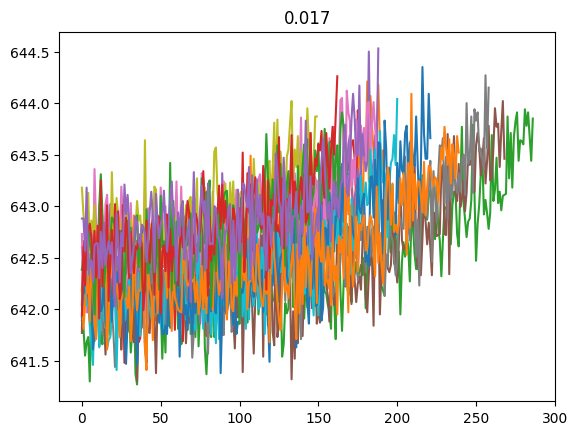

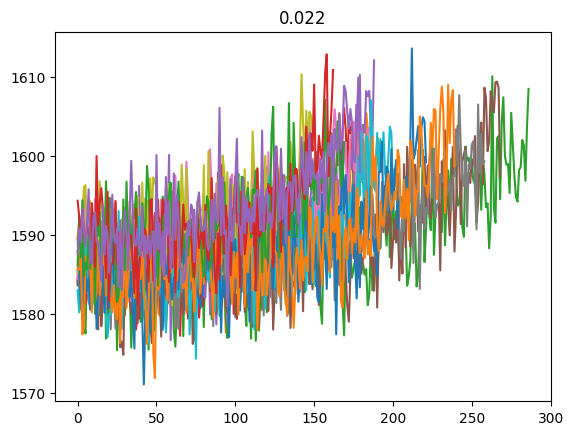

In [52]:
tren_1 = round(calculate_trendability(feature_id='2'),3)
tren_2 = round(calculate_trendability(feature_id='3'),3)

# Let's start by plotting our time series.
plt.title(tren_1)
for id_equipment in range(15):
    mask_equip1 = df['Equipment'] == id_equipment# Select column Equipment with value x
    signal = df.loc[mask_equip1,'2']
    plt.plot(range(len(signal)), signal )
plt.show()

plt.title(tren_2)
# Let's start by plotting our time series.
for id_equipment in range(15):
    mask_equip1 = df['Equipment'] == id_equipment# Select column Equipment with value x
    signal = df.loc[mask_equip1,'3']
    plt.plot(range(len(signal)), signal )
plt.show()